In [2]:
import numpy as np
import pandas as pd

df_train =pd.read_csv('train.csv')
df_test =pd.read_csv('test.csv')

In [2]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print df_train.shape
print df_test.shape

(42000, 785)
(28000, 784)


In [4]:
y_train = df_train.label.as_matrix()

X_test = df_test.as_matrix()
X_train = df_train.drop("label",axis=1).as_matrix()

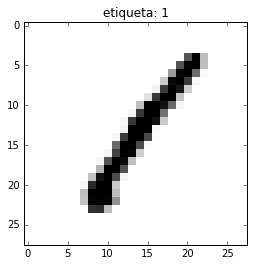

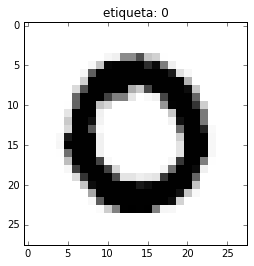

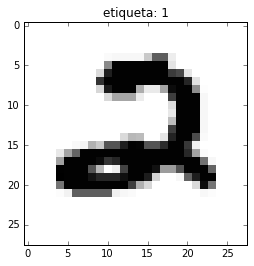

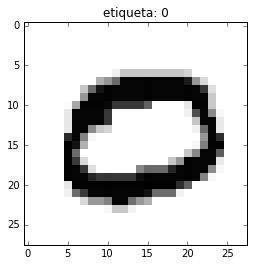

In [29]:
def ver_imagen(X,Y,n):
    aux = X[n].copy()

    ima = np.zeros((28,28))
    j = 0
    i= 0
    for k in range(len(aux)):
        if i < 28:
            ima[j,i]= aux[k]
            i+=1
        else:
            j+=1
            i = 0
            ima[j,i]= aux[k]
            i+=1

    import matplotlib.pyplot as plt
    plt.figure(figsize=(12,4))
    plt.title("etiqueta: "+str(Y[n]))
    plt.imshow(ima, cmap='Greys',interpolation="nearest")
    plt.show()
ver_imagen(X_train,y_train,0)
ver_imagen(X_train,y_train,1)

## Escalar los datos

Datos escalados normalmente


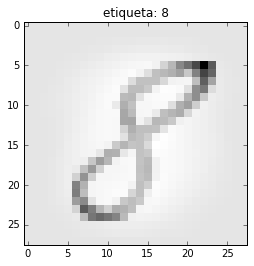

Datos escalados por la intesidad maxima


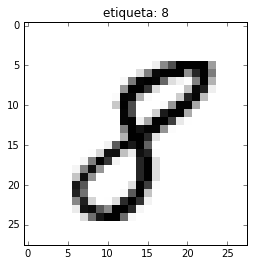

Datos escalados llevados a ceros y unos


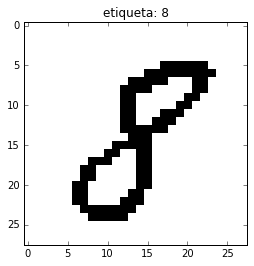

In [8]:
from sklearn.preprocessing import StandardScaler

def scaler_t(X,Xt,scaler_type):
    if scaler_type == "standar": #-1 a 1
        scaler= StandardScaler(with_std=True).fit(X)
        return scaler.transform(X), scaler.transform(Xt)
    elif scaler_type == "int_max": #0 y 1
        aux = [ X/255.0, Xt/255.0 ]
        newX = aux[0].copy()
        newXt = aux[1].copy()
        return newX,newXt
    elif scaler_type == "zeros_ones":
        newX = X.copy()
        newXt = Xt.copy()
        newX[ newX <128] = 0
        newX[ newX > 127] = 1
        newXt[ newXt < 128] = 0
        newXt[ newXt > 127] = 1
        return newX,newXt
    else: #otro
        return X*0.5
    
print "Datos escalados normalmente"
X,Xt = scaler_t(X_train,X_train,"standar")
ver_imagen(X,y_train,30)

print "Datos escalados por la intesidad maxima"
X,Xt = scaler_t(X_train,X_train,"int_max")
ver_imagen(X,y_train,30)

print "Datos escalados llevados a ceros y unos"
X,Xt = scaler_t(X_train,X_train,"zeros_ones")
ver_imagen(X,y_train,30)

# Entrenar el modelo

In [32]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import SGD,RMSprop

Xtr,Xt = scaler_t(X_train,X_train,"standar")
Ytr = to_categorical(y_train)

print "Para representacion datos normalizados estandar"

#experimentar variando valores
model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy')
model.fit(Xtr, Ytr, nb_epoch=50, batch_size=32, verbose=0)
print "\m Train ACCURACY (activation relu-softmax) = %f"% model.evaluate(Xtr, Ytr)

model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr, Ytr, nb_epoch=50, batch_size=32, verbose=0)
print "\n Train (activation relu-sigmoid) = %f"%model.evaluate(Xtr, Ytr)[1]

model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='softplus'))
model.compile(optimizer=SGD(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr, Ytr, nb_epoch=50, batch_size=32, verbose=0)
print "\n Train (activation relu-sigmoid) = %f"% model.evaluate(Xtr, Ytr)[1]

model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='sigmoid'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(Xtr, Ytr, nb_epoch=50, batch_size=32, verbose=0)
print "\n Train ACCURACY (optimizer RMSprop and activation relu-sigmoid) = %f"% model.evaluate(Xtr, Ytr)[1]

print "------------------------------------------------"

Para representacion datos normalizados estandar
41792/42000 [============================>.] - ETA: 0s
 Train (activation relu-sigmoid) = 0.997181
41888/42000 [============================>.] - ETA: 0s
 Train (activation relu-sigmoid) = 0.897512
41856/42000 [============================>.] - ETA: 0s
 Train ACCURACY (optimizer RMSprop and activation relu-sigmoid) = 0.999276
------------------------------------------------


In [9]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from keras.optimizers import SGD,RMSprop

Xtr,Xt = scaler_t(X_train,X_test,"int_max")
Ytr = to_categorical(y_train)

model = Sequential()
model.add(Dense(100, input_dim=Xtr.shape[1], init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='softmax'))
model.compile(optimizer=RMSprop(), loss='binary_crossentropy')
model.fit(Xtr, Ytr, nb_epoch=10, batch_size=32, verbose=1,validation_split = 0.10)
#print "\m Train ACCURACY (activation relu-softmax) = %f"% model.evaluate(Xtr, Ytr)

Using Theano backend.


Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 3s - loss: 0.0633 - val_loss: 0.0384
Epoch 2/10
37800/37800 [==============================] - 4s - loss: 0.0330 - val_loss: 0.0299
Epoch 3/10
37800/37800 [==============================] - 4s - loss: 0.0239 - val_loss: 0.0248
Epoch 4/10
37800/37800 [==============================] - 5s - loss: 0.0188 - val_loss: 0.0225
Epoch 5/10
37800/37800 [==============================] - 4s - loss: 0.0154 - val_loss: 0.0212
Epoch 6/10
37800/37800 [==============================] - 4s - loss: 0.0131 - val_loss: 0.0227
Epoch 7/10
37800/37800 [==============================] - 4s - loss: 0.0116 - val_loss: 0.0227
Epoch 8/10
37800/37800 [==============================] - 4s - loss: 0.0101 - val_loss: 0.0230
Epoch 9/10
37800/37800 [==============================] - 4s - loss: 0.0090 - val_loss: 0.0196
Epoch 10/10
37800/37800 [==============================] - 5s - loss: 0.0080 - val_loss: 0.0203


In [28]:
def write_submit(ids, label, file_name):
    assert len(ids) == len(label)
    with open(file_name, 'w') as f:
        f.write('ImageId,Label\n')
        for i, p in zip(ids, label):
            f.write('%s,%s\n' % (i, p))
    print('*wrote %s' % file_name)

write_submit(np.arange(1,X_test.shape[0]+1) ,model.predict_classes(X_test),"MiprimeraEntrega.csv")

27712/28000 [============================>.] - ETA: 0s*wrote MiprimeraEntrega.csv
